In [3]:
%pip install -Uq fastai

Note: you may need to restart the kernel to use updated packages.


In [107]:
from fastai.vision.all import *
from fastai.data.external import untar_data, URLs

Vision Segmentation

In [108]:
# Get data
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('C:/Users/Nickk/.fastai/data/camvid_tiny/codes.txt'),Path('C:/Users/Nickk/.fastai/data/camvid_tiny/images'),Path('C:/Users/Nickk/.fastai/data/camvid_tiny/labels')]

In [109]:
# Load and prepare data
def get_y_fn(x):
    return Path(str(x).replace('images', 'labels').replace('.png', '_P.png'))

In [110]:
# Create datablock
codes = np.loadtxt(path/'codes.txt', dtype=str)

segmentation = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                         get_items=get_image_files,
                         splitter=RandomSplitter(),
                         get_y=get_y_fn,
                         item_tfms=Resize(128),
                         batch_tfms=aug_transforms())
dls = segmentation.dataloaders(path/"images")

In [111]:
# Define the model
learn = unet_learner(dls, resnet34, metrics=Dice)


In [112]:
# Train the model
learn.fine_tune(2)

epoch,train_loss,valid_loss,dice,time
0,3.902327,3.535474,19.099507,00:00


epoch,train_loss,valid_loss,dice,time
0,3.633879,3.810361,19.363228,00:00
1,3.578762,3.164993,17.925389,00:00


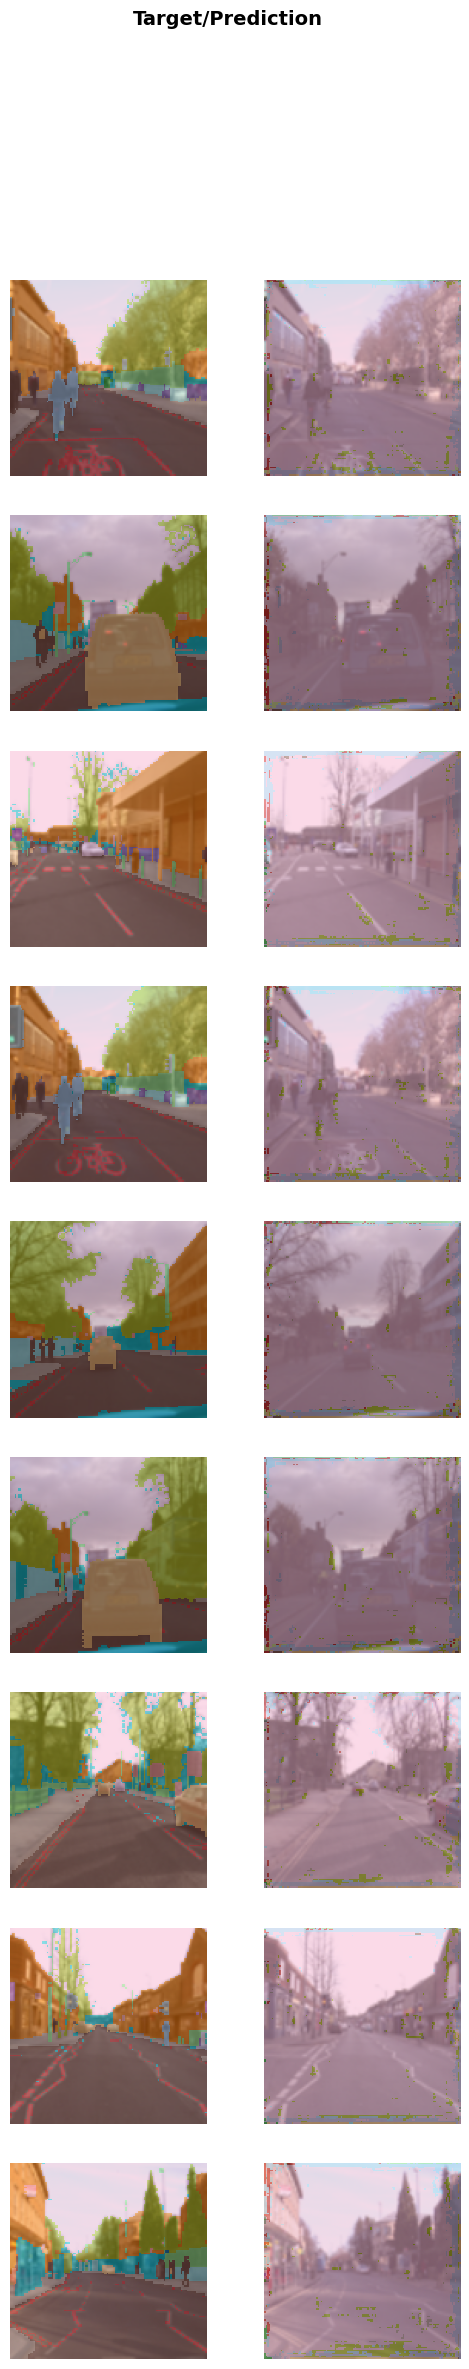

In [113]:
# Display results
learn.show_results()

Fast ai does not support object detection

Tabular Task

In [115]:
from fastai.tabular.all import *

In [116]:
# Load and prepare data
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

SuggestedLRs(valley=0.002511886414140463)

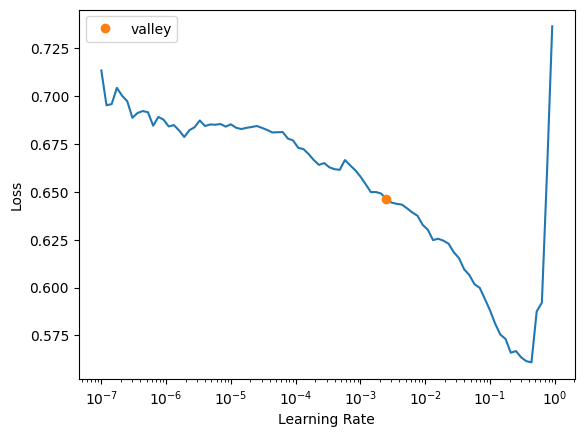

In [117]:
# Find the learning optimal learning rate
learn = tabular_learner(dls, metrics=accuracy)
learn.lr_find()

In [119]:
# Train the model based on suggested learning rate
learn.fit_one_cycle(3, 0.0025)

epoch,train_loss,valid_loss,accuracy,time
0,0.367386,0.355577,0.835227,00:02
1,0.350462,0.354912,0.836609,00:02
2,0.349079,0.355012,0.833845,00:02


In [120]:
import pandas as pd

# Load the Adult dataset into a DataFrame
df = pd.read_csv(path/'adult.csv')

# Make a prediction on the first instance in the dataset
row, clas, probs = learn.predict(df.iloc[0])

In [121]:
learn.show_results()
loss, accuracy = learn.validate()
print(f'Accuracy: {accuracy*100}%')

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,3.0,5.0,1.0,5.0,1.0,0.980556,-0.229914,-0.024242,0.0,1.0
1,1.0,12.0,5.0,1.0,2.0,3.0,1.0,-1.434049,1.126916,-0.415734,0.0,0.0
2,5.0,12.0,3.0,14.0,6.0,5.0,1.0,-0.336502,-0.395631,-0.415734,0.0,1.0
3,5.0,8.0,5.0,11.0,2.0,5.0,1.0,-0.921860,-0.256682,0.758743,0.0,0.0
4,5.0,1.0,3.0,4.0,1.0,5.0,1.0,-0.629181,0.380837,-1.590211,0.0,0.0
5,3.0,9.0,7.0,11.0,5.0,3.0,1.0,0.248857,0.088503,0.367250,0.0,0.0
6,5.0,12.0,4.0,5.0,2.0,5.0,1.0,1.126895,0.843558,-0.415734,0.0,0.0
7,5.0,12.0,1.0,8.0,5.0,5.0,1.0,0.029348,0.198386,-0.415734,0.0,0.0
8,5.0,1.0,5.0,8.0,4.0,5.0,1.0,-0.775521,-1.359276,-1.590211,0.0,0.0


Accuracy: 83.38451981544495%


Recommendation task

In [123]:
from fastai.collab import *

In [125]:
# Load and prepare data
path = untar_data(URLs.ML_SAMPLE)
data = pd.read_csv(path/'ratings.csv')

In [127]:
print(data.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [130]:
# Create a collab_learner
dls = CollabDataLoaders.from_df(data, item_name='movieId', bs=64)
learn = collab_learner(dls, y_range=(0.5,5.5))


SuggestedLRs(valley=3.0199516913853586e-05)

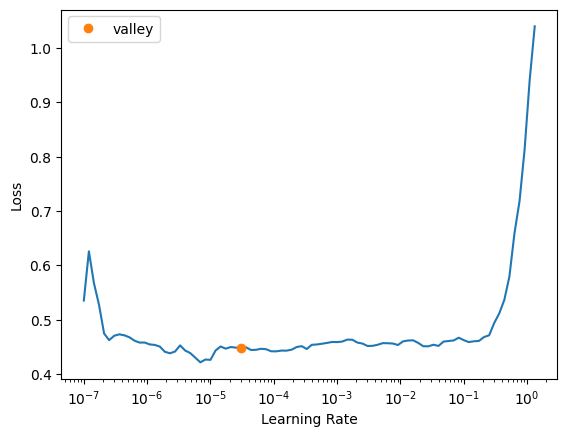

In [132]:
# Get the optimal learning rate
learn.lr_find()

In [138]:
# Train the model
learn.fit_one_cycle(3, 3e-5)

epoch,train_loss,valid_loss,time
0,0.452142,0.622446,00:00
1,0.448447,0.622427,00:00
2,0.448687,0.622410,00:00


In [145]:
# Get the model's predictions and targets
preds, targets = learn.get_preds()

# Calculate the mean squared error
mse = ((preds - targets)**2).mean()

# Print the MSE
print(f'Mean Squared Error: {mse.item()}')

Mean Squared Error: 1.2027122974395752


In [146]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,46.0,37.0,2.5,2.843498
1,27.0,11.0,3.0,3.288559
2,15.0,84.0,3.0,3.963597
3,31.0,5.0,5.0,3.692274
4,62.0,92.0,5.0,4.186898
5,38.0,7.0,5.0,4.495850
6,63.0,81.0,3.5,3.548007
7,18.0,86.0,3.5,3.688083
8,65.0,11.0,2.5,3.087998
